# Importação / Função

In [1]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.0 MB/s 


Importações

In [30]:
#Padrão
import pandas as pd
import numpy as np

# Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Visualização
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Modelos Machine Learning
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.linear_model import  Lasso, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE, mutual_info_regression



  # Avaliação
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics  import r2_score

Importação dos dados, seleção das features importantes, sepando o ID e o SalePrice que é o nosso target.

In [86]:
df_treino = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos Portfólio/Regressão/Casas/dataset_tratado_treino.csv')
df_teste = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos Portfólio/Regressão/Casas/dataset_tratado_teste.csv')
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos Portfólio/Regressão/Casas/dataset_tratado_alvo.csv')
ID_treino = df_treino['Id']
ID_teste = df_teste['Id']
df_treino.drop('Id', axis=1, inplace=True)
df_teste.drop('Id', axis=1, inplace=True)

In [5]:
df_teste = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos Portfólio/Regressão/Casas/Novo modelo/teste_tratado.csv')
df_treino = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos Portfólio/Regressão/Casas/Novo modelo/treino_tratado.csv')
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos Portfólio/Regressão/Casas/Novo modelo/target_tratado.csv')

In [6]:
sns.set(rc={'figure.figsize':(30,15)})
plt.style.use('ggplot')

# Predição

## Preparação do dataset


- Fazer 3 tratamentos dos dados categoricos para verificar quem aparenta ser o melhor modelo

  1. Com label Encoder
  2. Com target Encoder
  3. Com frequency Encoder 
- Encoder faz parte da parte de Feature Engineering, mas como é algo que pode alterar o resultado, vou fazer somente nessa etapa para verificar qual encoder corresponder melhor aos dados padrões

In [7]:
# Target e preencher vázio
y_treino = y.copy()
y_treino = y.values.ravel()
# def imputer(df):
#   std = StandardScaler()
#   df.iloc[:,:] = std.fit_transform(df)
#   impu = KNNImputer(n_neighbors= 15)
#   df.iloc[:,:] = impu.fit_transform(df)
#   df.iloc[:,:] = std.inverse_transform(df)
#   return df
def imputer(df):
  from sklearn.impute import SimpleImputer
  # Usando mediana para evitar problemas com outliers
  si = SimpleImputer(strategy='median')
  df.iloc[:,:] = si.fit_transform(df)

  return df
# Label Encoder (LE)
treino_LE = df_treino.copy()
teste_LE = df_teste.copy()

# Target Encoder (TE)
treino_TE = df_treino.copy()
teste_TE = df_teste.copy()

columns = df_treino.columns[8:]
treino_TE['target'] = y_treino
for i in columns:
  a = treino_TE.groupby(i)['target'].mean()
  treino_TE[i] = treino_TE[i].map(a)
  teste_TE[i] = teste_TE[i].map(a)
treino_TE = treino_TE.drop('target',axis=1)
print(f'Há {teste_TE.isnull().sum().sum()} vazios gerados por categóricos inexistentes na base da dados')
teste_TE = imputer(teste_TE)
print(f'Há {teste_TE.isnull().sum().sum()} dados vazios após o tratamento')

# Frequency Encoder (FE)
treino_FE = df_treino.copy()
teste_FE = df_teste.copy()

for i in columns:
  sub = treino_FE[i].value_counts()/treino_FE.shape[0]
  treino_FE[i] = treino_FE[i].map(sub)
  teste_FE[i] = teste_FE[i].map(sub)

print(f'Há {teste_FE.isnull().sum().sum()} vazios gerados por categóricos inexistentes na base da dados')
teste_FE = imputer(teste_FE)
print(f'Há {teste_FE.isnull().sum().sum()} dados vazios após o tratamento')

Há 4257 vazios gerados por categóricos inexistentes na base da dados
Há 0 dados vazios após o tratamento
Há 4257 vazios gerados por categóricos inexistentes na base da dados
Há 0 dados vazios após o tratamento


In [8]:
datasets = {
    'Label':treino_LE,
    'Target':treino_TE,
    'Freq':treino_FE
}

## Algoritmos Machine Learning

In [16]:
def modelos_(entrada, df=None, n_modelos=None, param=None):

  if entrada == 1:
    modelos = [
             ['SVR', SVR()],
             ['lg',LGBMRegressor(n_estimators=500)]
             ]



    return modelos
  elif entrada == 2:
    modelos = [
             [('SVR', SVR()), df[0]],
             [('ad',AdaBoostRegressor()), df[1]],
             [('gb',GradientBoostingRegressor()), df[2]],
             [('et',ExtraTreesRegressor()), df[3]],
             [('rf',RandomForestRegressor()), df[4]],
             [('lasso', Lasso(alpha=0.85)), df[5]],
             [('xg',XGBRegressor(objective = "reg:squarederror")), df[6]],
             [('lg',LGBMRegressor()), df[7]],
             [('sgd',SGDRegressor()), df[8]],
             [('knn',KNeighborsRegressor()), df[9]],
             ]
    modelos = np.array(modelos)
    modelos = modelos[modelos[:,1].argsort()[::-1]].tolist()
    modelos = np.array(modelos)[:n_modelos]
    modelos = modelos.T

    return modelos
  elif entrada == 3:
    
    modelos_k = {'SVR':{},
                'ad':{},
                'gb':{},
                'et':{},
                'rf':{},
                'lasso':{},
                'xg':{},
                'lg':{},
                'sgd':{},
                'knn':{},
                }
                
    for i in param:
      modelos_k[i] = param[i]

    modelos_kl = {
                'SVR':SVR(**modelos_k['SVR']),
                'ad':AdaBoostRegressor(**modelos_k['ad']),
                'gb':GradientBoostingRegressor(**modelos_k['gb']),
                'et':ExtraTreesRegressor(**modelos_k['et']),
                'rf':RandomForestRegressor(**modelos_k['rf']),
                'lasso':Lasso(**modelos_k['lasso']),
                'xg':XGBRegressor(objective = "reg:squarederror", **modelos_k['xg']),
                'lg':LGBMRegressor(**modelos_k['lg']),
                'sgd':SGDRegressor(**modelos_k['sgd']),
                'knn':KNeighborsRegressor(**modelos_k['knn']),
                }


    saida = {}
    for i in param:
      saida.update({i : modelos_kl[i]})

    return saida
  elif entrada == 4:
    modelos = {'SVR': SVR(),
               'lg':LGBMRegressor(n_estimators=500)}
  return modelos
    

## Análise Encoders

### Função

In [10]:
# --------- 1 ----------


def regress(df, y):
  df_resultado = pd.DataFrame()
  indices = np.array(modelos_(1)).T[0]
  if len(df) > 1:
    for ii in df:
      print(ii)
      df_1 = df[ii].copy()

      modelos = modelos_(1)

      # Looping passando o cross val em cada modelo, retornando a média dos resultados pelo R2 e adicionando em uma lista.
      resultados = []
      for i in modelos:
        model = i[1]
        resultado = cross_val_score(model, df_1.values, y, cv=10, scoring='r2').mean()
        resultados.append(resultado*100)
      df_resultado[f'{ii}'] = resultados

    res = pd.DataFrame()
    for i in df_resultado:
      j = []
      for nn in df_resultado[i]:
        if nn < 1:
          nn = 0
        j.append(round(nn,3))
      res[i] = j

    res['models'] = indices
    re_teste = res.melt(id_vars='models').rename(columns=str.title)
    fig = sns.barplot(data=re_teste, x='Models',y='Value',hue='Variable', linewidth=5)
    for i in fig.patches:
      fig.annotate(f'{round(i.get_height(),3)}%',xy=(i.get_xy()[0]+0.03, i.get_height()+0.6), fontsize=9)
    fig.set_title('Avaliação dos Encoders', fontsize=25, y=1.05)

    return res
  else:
    df_1 = df['treino'].copy()
    modelos = modelos_(1)
    df_resultado['Modelos'] = indices
    # Looping passando o cross val em cada modelo, retornando a média dos resultados pelo R2 e adicionando em uma lista.
    resultados = []
    for i in modelos:
      model = i[1]
      resultado = cross_val_score(model, df_1.values, y, cv=10, scoring='r2').mean()
      if resultado > 1:
        resultado = 0
      else:
        resultados.append(resultado*100)
    df_resultado['Resultados'] = resultados
    return df_resultado




### Resultado

Label
Target
Freq


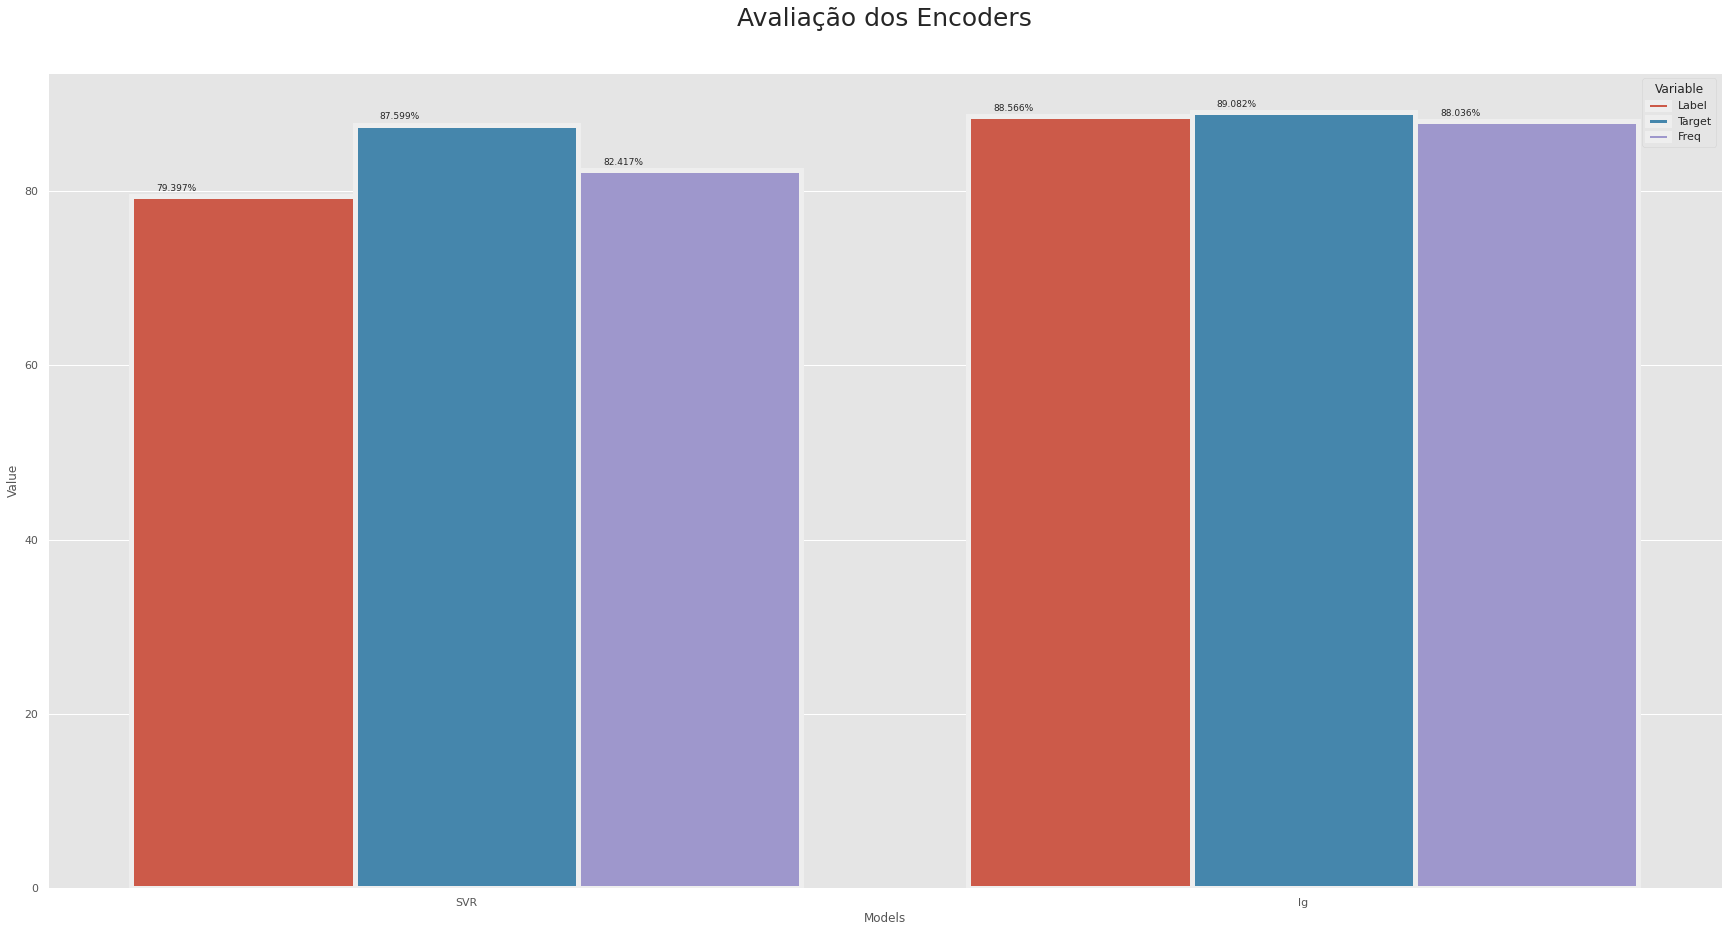

In [11]:
resultados = regress(datasets, y_treino)

<h2><font color='lightblue'> Conclusão </font></h2>
<h3> -  Melhor resultado foi presente no TargetEncoder, então será utilizado.

## Análise padronização

### Função

In [12]:
def norm(df, y):
  # Sem normalização
  df_pad = df.copy()

  # Min Max
  mm = MinMaxScaler()
  df_mm = df.copy()
  df_mm.iloc[:,:] = mm.fit_transform(df_mm)

  # Standar Scaler
  ss = StandardScaler()
  df_ss = df.copy()
  df_ss.iloc[:,:] = ss.fit_transform(df_ss)

  # Robust Scaler
  rs = RobustScaler()
  df_rs = df.copy()
  df_rs.iloc[:,:] = rs.fit_transform(df_rs)

  datasets = {
      'Sem Norm':df_pad,
      'MinMax':df_mm,
      'StdSca':df_ss,
      'RobSca':df_rs
  }
  resultados = regress(datasets, y_treino)
  return resultados


### Resultado

Sem Norm
MinMax
StdSca
RobSca


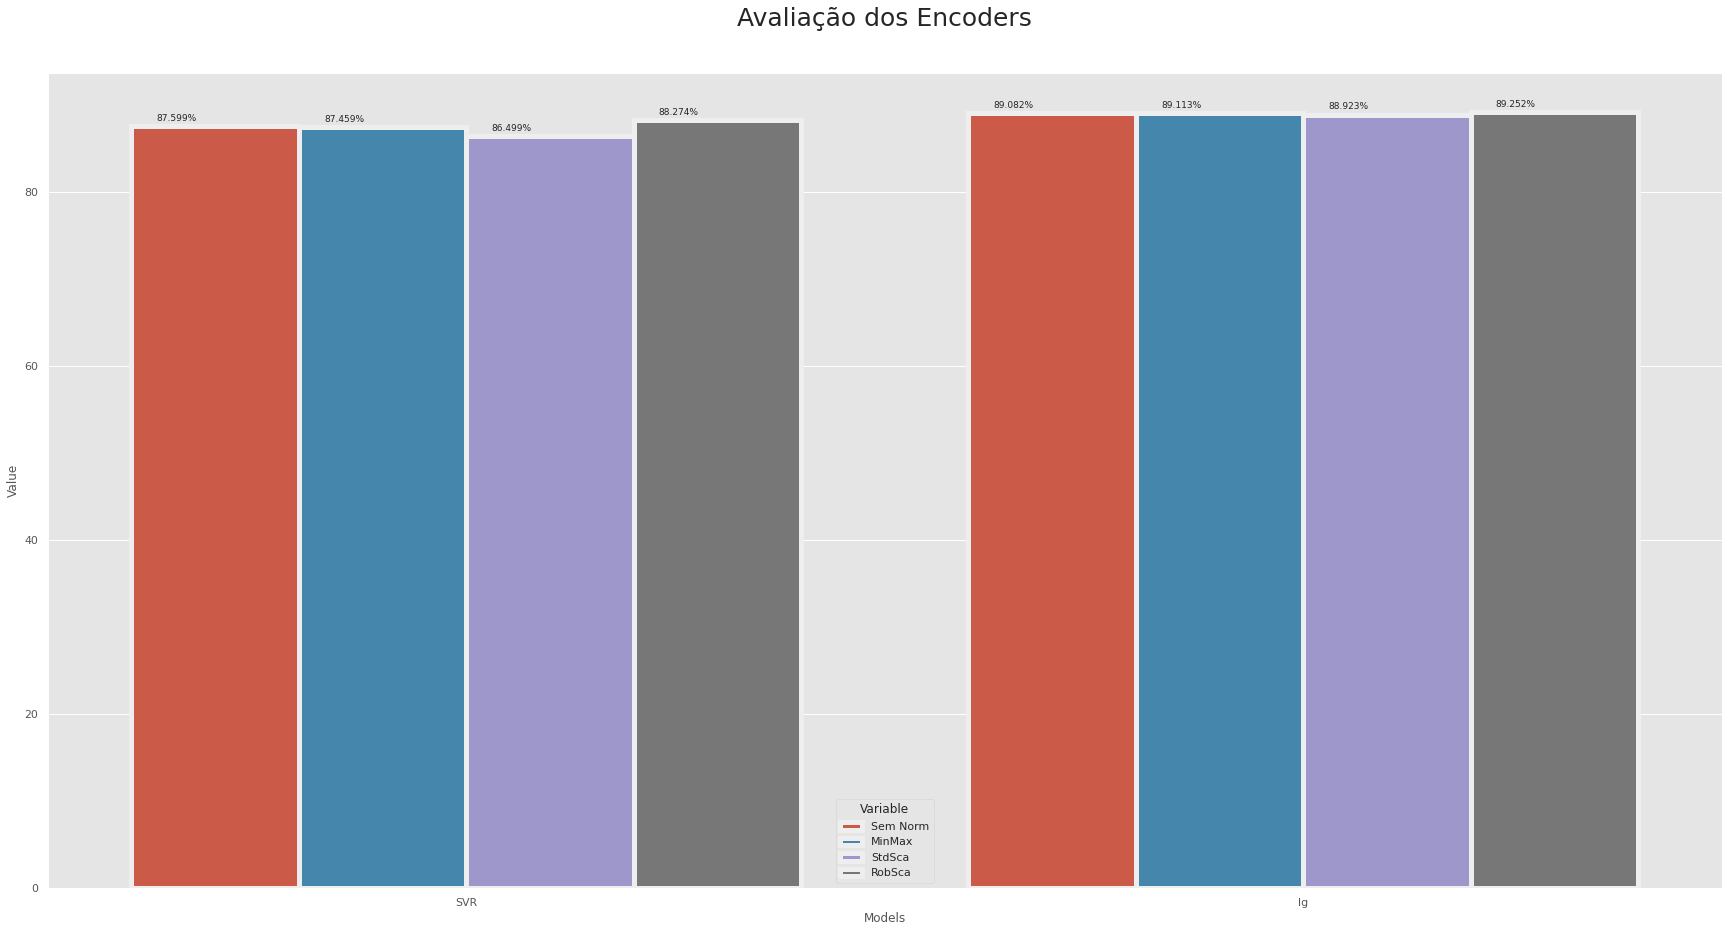

In [13]:
resultado = norm(treino_TE, y_treino)

<h2><font color='lightblue'> Conclusão </font></h2>
 
- Melhor modelo para ambos foi o Robust Scaler

In [14]:
ss = RobustScaler()
treino_p2 = treino_TE.copy()
teste_p2 = teste_TE.copy()
teste_p2.iloc[:,:] = ss.fit_transform(teste_p2)
treino_p2.iloc[:,:] = ss.fit_transform(treino_p2)

## Análise Voting

In [87]:
Modelos = ['lg','SVR']
base = modelos_(4)
base = [(i, base[i]) for i in Modelos]
Pesos = [0.6, 0.4]


In [89]:

voto = VotingRegressor(estimators=base, weights=Pesos)
cv = KFold(n_splits=10,shuffle=True,random_state=10)
resultado = cross_val_score(voto, treino_p2, y_treino, cv=cv, scoring='r2').mean()*100
print(resultado)


89.75954212505994


<h2><font color='lightblue'> Conclusão </font></h2>

- Utilizando a metrica de r2 score, os resultados obtidos foram os seguintes:
  - SVR: 88.274%
  - LightB: 89.252%
  - Voting: 90.124%
 

## Feature Selection

### Função

In [46]:
def feat_sel(inicio, step):
  voto = VotingRegressor(estimators=base, weights=Pesos)
  # cv = KFold(n_splits=10,shuffle=True,random_state=5)
  results = []
  c=0
  for i in range(inicio,treino_p2.shape[1]+step, step):
    if i > treino_p2.shape[1]:
      i = treino_p2.shape[1]
    fs = SelectKBest(score_func = mutual_info_regression, k =i)
    sel = fs.fit(treino_p2.values, y_treino)
    col = sel.get_support(indices=True)
    res = cross_val_score(voto, treino_p2.iloc[:,col], y_treino, cv=cv, scoring='r2').mean()*100
    results.append([i, res])
    print(i, res)
    c += 1
    if c == 10:
      return results
  return results

def ap_fs(tr, te, ni):
  fs = SelectKBest(score_func = mutual_info_regression, k =ni)
  sel = fs.fit(tr, y_treino)
  col = sel.get_support(indices=True)
  tr_s = tr.iloc[:,col]
  te_s = te.iloc[:,col]
  return tr_s, te_s

### Resultados

In [39]:
feat_sel(20, 7)


20 87.56427249595475
27 88.83304108800891
34 89.87286757138936
41 90.02470515110362
48 90.14979013878745
55 90.08976496271885
62 90.09102810568453
68 90.12498098935252


[[20, 87.56427249595475],
 [27, 88.83304108800891],
 [34, 89.87286757138936],
 [41, 90.02470515110362],
 [48, 90.14979013878745],
 [55, 90.08976496271885],
 [62, 90.09102810568453],
 [68, 90.12498098935252]]

In [44]:
# Como o melhor resultado foi na faixa do 62 até 68, fazer uma avaliação do 60 até o 68
results_0 = feat_sel(41,1)


41 89.79980749238435
42 89.97145208932818
43 90.00407719731263
44 90.05675171440204
45 90.07796031326404
46 89.89970579097717
47 89.98327877387851
48 90.08883148770622
49 90.27278869933075
50 90.1849658531515


In [45]:
results_0 = feat_sel(51,1)

51 90.08549474660012
52 90.13581104877429
53 90.16689843331092
54 90.1217541218193
55 90.06471031497799
56 90.05980140711438
57 90.20421504476964
58 90.17560664457491
59 90.02864862228621
60 90.15498559696394


<h2><font color='lightblue'> Conclusão </font></h2>

- Com a análise das Feature Selection o melhor número de features foi de 49, proporcionando uma melhora para 90.272 % de R2


In [47]:
treino_p3 = treino_p2.copy()
teste_p3 = teste_p2.copy()
treino_p3, teste_p3 = ap_fs(treino_p3, teste_p3, 49)

In [48]:
treino_p3.columns

Index(['LotFrontage', 'LotArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'GarageArea', 'Fireplaces', 'YearBuilt', 'MSSubClass',
       'TotRmsAbvGrd', 'YearRemodAdd', 'OverallCond', 'OverallQual',
       'GarageCars', 'FullBath', 'BedroomAbvGr', 'BsmtFullBath', 'GarageYrBlt',
       'MasVnrArea', 'BsmtFinSF1', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'GarageFinish', 'Fence', 'FireplaceQu', 'MSZoning',
       'Electrical', 'BsmtExposure', 'Exterior1st', 'GarageQual', 'BsmtQual',
       'Exterior2nd', 'HouseStyle', 'HeatingQC', 'PavedDrive', 'Neighborhood',
       'CentralAir', 'GarageType', 'SaleCondition', 'KitchenQual', 'ExterQual',
       'MasVnrType', 'Foundation', 'BsmtFinType1', 'SaleType', 'GarageCond',
       'LotShape'],
      dtype='object')

## Parameters tunning

### Função

In [58]:
def bobh(df):
  from skopt import BayesSearchCV
  from skopt.space import Real, Categorical, Integer


  # To define all params 
  space = {'SVR':{'C':Real(0.01, 1),
                  'epsilon':Real(0.01,1)},
           'lg':{'learning_rate':Real(0.01, 1),
              'n_estimators':Integer(500,5000),
              'max_depth' : Integer(1,10)}
          }
           
  results = {}
  # Searching
  for i,ii in zip(base, Modelos ):
    print(i,ii)
    search = BayesSearchCV(i[1], space[ii], n_iter=20, random_state=10, cv=cv, return_train_score=True, scoring='r2', refit=True, verbose=True).fit(df,y_treino)
    results.update({i[0]:search.best_params_})

  parametros = modelos_(3, param=results)
  return parametros


### Resultados

In [60]:
parameters = bobh(treino_p3)

('lg', LGBMRegressor(n_estimators=500)) lg
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates,

In [61]:
parameters

{'SVR': SVR(C=0.8857962831665025, epsilon=0.01),
 'lg': LGBMRegressor(learning_rate=0.01, max_depth=7, n_estimators=2841)}

In [63]:
base_final = [(i, parameters[i]) for i in parameters]
base_final

[('lg', LGBMRegressor(learning_rate=0.01, max_depth=7, n_estimators=2841)),
 ('SVR', SVR(C=0.8857962831665025, epsilon=0.01))]

In [65]:
voto = VotingRegressor(estimators=base_final, weights=Pesos)
base_final.append(('voting',voto))
for i in base_final:
  print(i)
# resultado = cross_val_score(voto, treino_p2, y_treino, cv=cv, scoring='r2').mean()*100

('lg', LGBMRegressor(learning_rate=0.01, max_depth=7, n_estimators=2841))
('SVR', SVR(C=0.8857962831665025, epsilon=0.01))
('voting', VotingRegressor(estimators=[('lg',
                             LGBMRegressor(learning_rate=0.01, max_depth=7,
                                           n_estimators=2841)),
                            ('SVR', SVR(C=0.8857962831665025, epsilon=0.01)),
                            ('voting',
                             <Recursion on VotingRegressor with id=140167694539600>)],
                weights=[0.6, 0.4]))


In [72]:
for i in base_final:
  v = i[1]
  if i[0] == 'voting':
    v = VotingRegressor(estimators=base_final[:2], weights=Pesos)
  resultado = cross_val_score(v, treino_p3, y_treino, cv=cv, scoring='r2').mean()*100
  print(i[0], resultado)

lg 89.61177666700308
SVR 88.97466727891671
voting 90.45880328123822


In [73]:
for i in base_final:
  v = i[1]
  if i[0] == 'voting':
    v = VotingRegressor(estimators=base_final[:2], weights=Pesos)
  resultado = cross_val_score(v, treino_p2, y_treino, cv=cv, scoring='r2').mean()*100
  print(i[0], resultado)

lg 89.60853454462043
SVR 88.83987800590415
voting 90.40304069224294


<h2><font color='lightblue'> Conclusão </font></h2>

- Antes do FS e do hyperparametro
  - SVR: 88.274%
  - LightB: 89.252%
  - Voting: 90.124%

- Pós FS e hyperparametro
  - SVR: 88.97%
  - LightB: 89.61%
  - voting: 90.45%

- Foi ganho um certo nível de acerto depois dos filtros utilizados.

## Treinamento e Exportação


In [ ]:
model = voto.fit(treino_p2, y_treino)
prev = np.exp(model.predict(teste_p2)).tolist()
export = pd.DataFrame()
export['Id'] = ID_teste
export['SalePrice'] = prev
export

In [85]:
export.to_csv('/content/drive/MyDrive/Colab Notebooks/Projetos Portfólio/Regressão/Casas/Previsões/2_models.csv',index=False)